In [17]:
# First Import the Necessary Python Libraries
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd

# Now load in the first dataset
erads = xr.open_dataset('ERA5.max_2m_temp.daily.2015-2019.nc')


In [18]:
# Now look at what's inside the dataset
erads

<xarray.Dataset> Size: 95MB
Dimensions:  (time: 1826, lat: 90, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 15kB 2015-01-01 2015-01-02 ... 2019-12-31
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Data variables:
    tasmax   (time, lat, lon) float32 95MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-10 21:41:38 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [19]:
# The data is 3-dimensional, time x latitude x longitude. The time dimension is 1826 long (365 days x 5 years + 1 leap year in there, 2016). Lat is 90, lon is 144.
# The variable in this dataset is the daily max 2 meter temperature, 'tasmax'  
# let's load in the temperature, lat, and lon

# load in the daily max 2 m temperature
eratemp=erads.tasmax 

# convert to Fahrenheit
eratemp=1.8*(eratemp-273.15)+32 
# load in the longitude, latitude, and time 
lon=erads.lon 
lat=erads.lat 
eratime=erads.time  

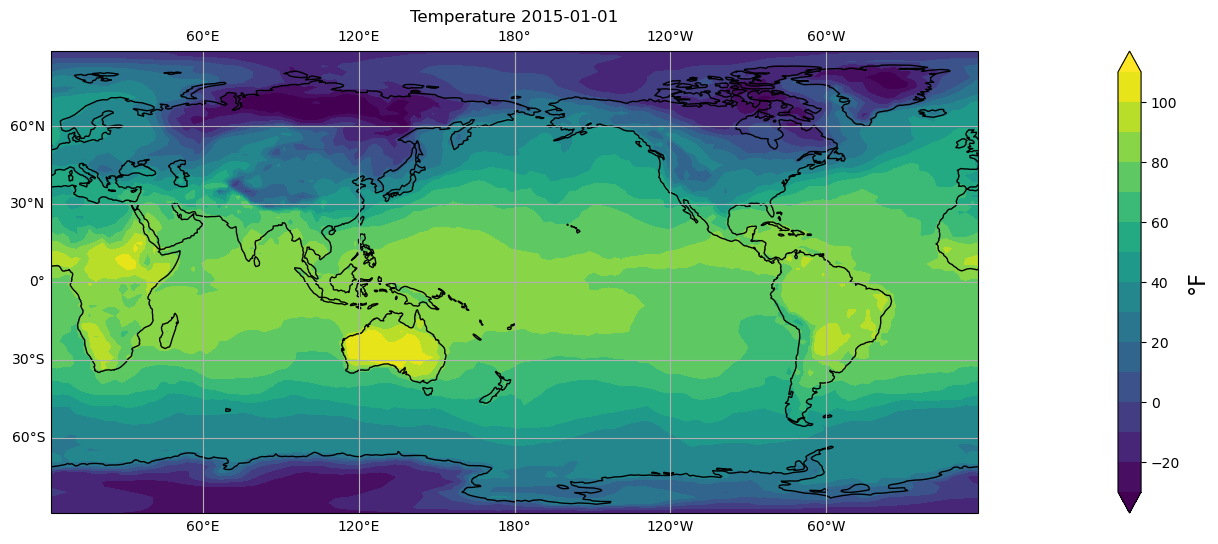

In [29]:
# Now let's plot the data for January 1st, 2015. Just to visualize what it looks like.

# Re-select data for January 1st, 2015
eratemp_want = eratemp.sel(time='2015-01-01')

# Specify color bar properties
color_min = -30  # lower limit of -30°F
color_max = 110  # upper limit of 110°F
numberofsteps = 15
colorlevels = np.linspace(color_min, color_max, numberofsteps)

# Initialize the figure
fig = plt.figure(figsize=(36, 6))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

# Plot the temperature data
plotnow = axs.contourf(lon, lat, eratemp_want, levels=colorlevels, extend='both', transform=ccrs.PlateCarree())

# Add coastlines and gridlines
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label
cbar = fig.colorbar(plotnow)
cbar.set_label('°F', fontsize=16)

# Add a title
plt.title('Temperature ' + pd.Timestamp(eratemp_want.time.values).strftime('%Y-%m-%d'))

# Show the plot
plt.show()


In [ ]:
#Answer the following questions to check for understanding, you can type it right into the notebook

#1. What colors do you see near the equator? What about near the poles? Does this make sense according to the colorbar?

#2. Where is it the coldest?

#3. Which is warmer, the Northern Hemisphere or the Southern Hemisphere? Why?



In [ ]:
# What's next is some tasks to practice your coding skills. It's probably best to copy and paste some of the code above and modify where needed. 

#1. Plot the temperature for January 3rd, 2015

In [ ]:
#2. Plot the temperature for May 3rd, 2015

In [ ]:
#3. Plot the temperature for June 2nd, 2016

In [ ]:
#4. Plot the temperature for July 25, 2018

In [ ]:
#4. Plot the temperature for your birthday or someone you love or admire's birthday in 2017

In [ ]:
# Critical thinking: 
# 1. Look at your plots for January and July. How do the Northern and Southern Hemisphere's compare in both of these months? What about in May? Does this all make sense?

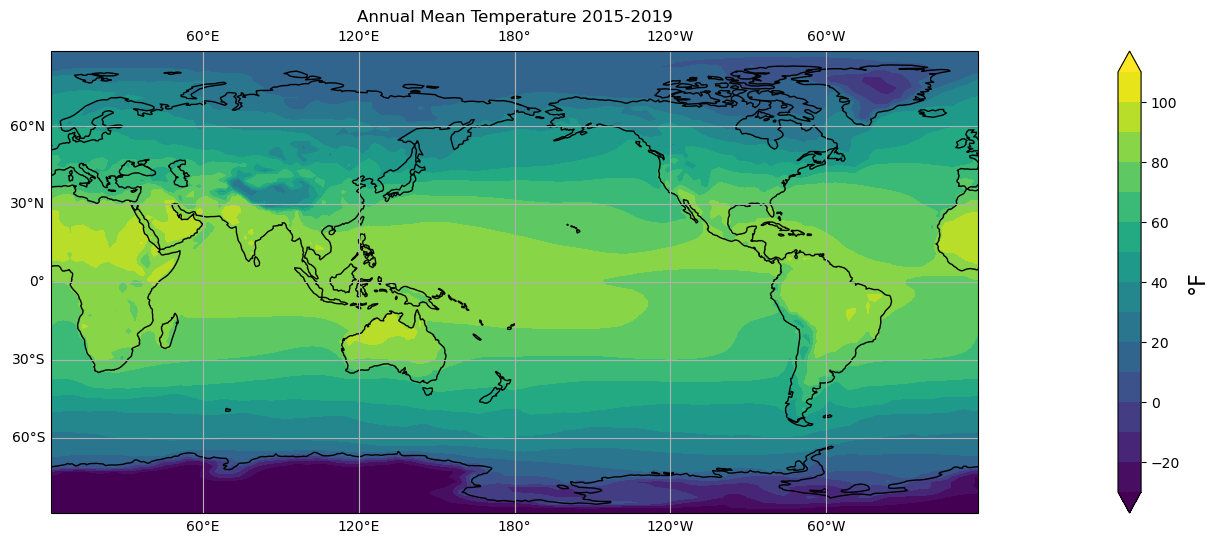

In [21]:
# Now let's plot the average temperature of the whole dataset. Another way of saying this is the climatology. In this case
# this climatology is calculated over the whole year, not just a season, so it is the annual-mean climatology

eraclim = eratemp.mean(dim='time')

# Initialize the figure
fig = plt.figure(figsize=(36, 6))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

plotnow = axs.contourf(lon, lat, eraclim, levels=colorlevels, extend='both', transform=ccrs.PlateCarree())

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(plotnow)
cbar.set_label('°F', fontsize=16)

# Add a title to the plot
plt.title('Annual Mean Temperature 2015-2019')

# Show the plot
plt.show()


In [ ]:
# Observations:
# 1. How does this annual mean temperature compare to the temperature on January 2nd 2015 and the other dates?

In [22]:
# Let's get the climatological temperature values for specific locations now. As an example, let's start with Paris
# located at Latitude: 48.8566° N, Longitude: 2.3522° E
loc1tempera = eraclim.sel(lat = 48.8566, lon = 2.3522, method='nearest').values
print('Paris Annual Temperature ' + str(np.round(loc1tempera,1)) + ' F')

# now let's do NY, which is at Latitude: 40.7128° N, Longitude: 74.0060° W
# since NY has a W longitude, we need to do 360 - 74.0060, when specifying longitude 
loc2tempera = eraclim.sel(lat = 40.7128, lon = 360 - 74.0060, method='nearest').values
print('NYC Annual Temperature ' + str(np.round(loc2tempera,1))+ ' F')

# Let's also do Trinidad Latitude: 10.6918° N, Longitude: 61.2225° W
loc3tempera = eraclim.sel(lat = 10.6918, lon = 360 - 61.2225, method='nearest').values
print('Trinidad Annual Temperature ' + str(np.round(loc3tempera,1))+ ' F')


Paris Annual Temperature 59.4 F
NYC Annual Temperature 59.8 F
Trinidad Annual Temperature 81.3 F


In [ ]:
# As you can see, Paris and NYC have very similar annual-mean temperatures.
# Trinidad, on the hand, is much warmer. Why?

# Pick 3 more locations of your own and find the annual mean temperatures there. These places could be anywhere
# some ideas could be where you or your family is from or maybe where your favorite sports team is from, but it's entirely up to you!

# Hint: copy and paste the code above into a new cell, then modify to match the lat and lon of your location, Don't forget to make new variable names

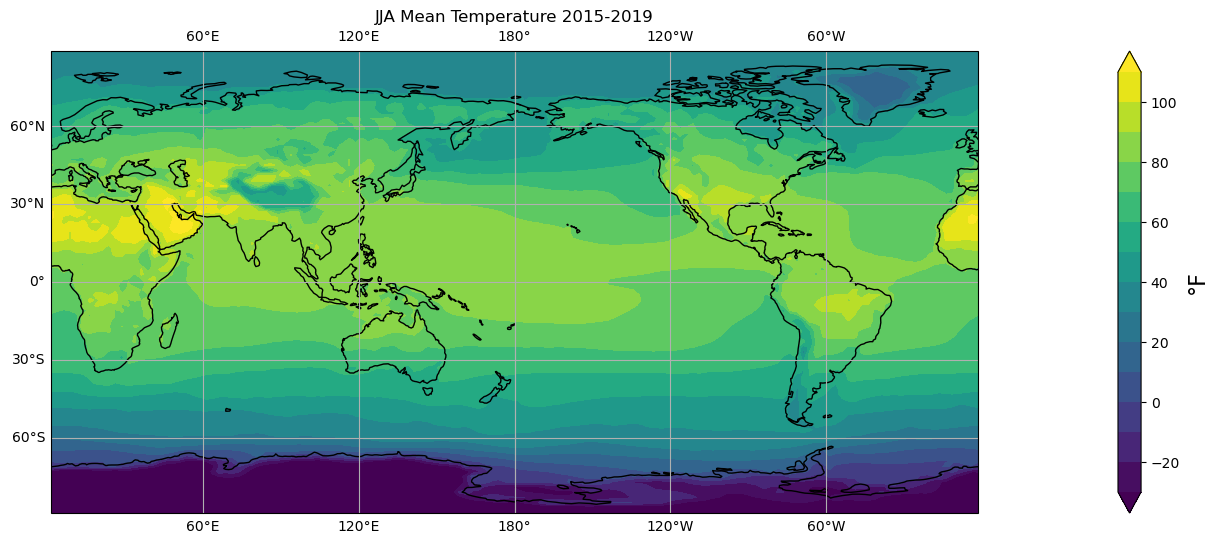

In [27]:
# Now let's plot the average temperature for just Northern Hemisphere (boreal) summer, defined as June, July, August.


eraclimjja=eratemp.sel(time=eratemp['time'].dt.month.isin([6,7,8])).mean(dim='time')

# Initialize the figure with the specified projection
fig = plt.figure(figsize=(36, 6))
# We also have to specify a map projection
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

plotnow = axs.contourf(lon, lat, eraclimjja, levels=colorlevels, extend='both', transform=ccrs.PlateCarree())

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(plotnow)
cbar.set_label('°F', fontsize=16)

# Add a title to the plot
plt.title('JJA Mean Temperature 2015-2019')

# Show the plot
plt.show()


In [ ]:
# How does the JJA mean compare to the annual mean from the previous plot?

In [ ]:
# Do the same but for Boreal Winter: December, January, February. How does DJF compare to the annual mean and JJA?

In [32]:
# Great, so now what we have a sense of what 2 m temperature looks like in the current climate. Now let's look at some
# future possible climates. For this we need to use climate simulation data. In this case we are using a SSP5-8.5 simulation of 
# NOAA GFDL's CM4 model. Let's start by looking at the years 2095-2099

# load in the daily max 2 m temperature and convert to Fahrenheit
ssp5ds = xr.open_dataset('cm4_ssp5.max_2m_temp.daily.2095-2099.nc')
ssp5temp=ssp5ds.tasmax 
ssp5temp=1.8*(ssp5temp-273.15)+32 

In [ ]:
# Now just as we did before, on your own, calculate the annual-mean climatology for the ssp5-8.5 data
#  call it ssp5clim

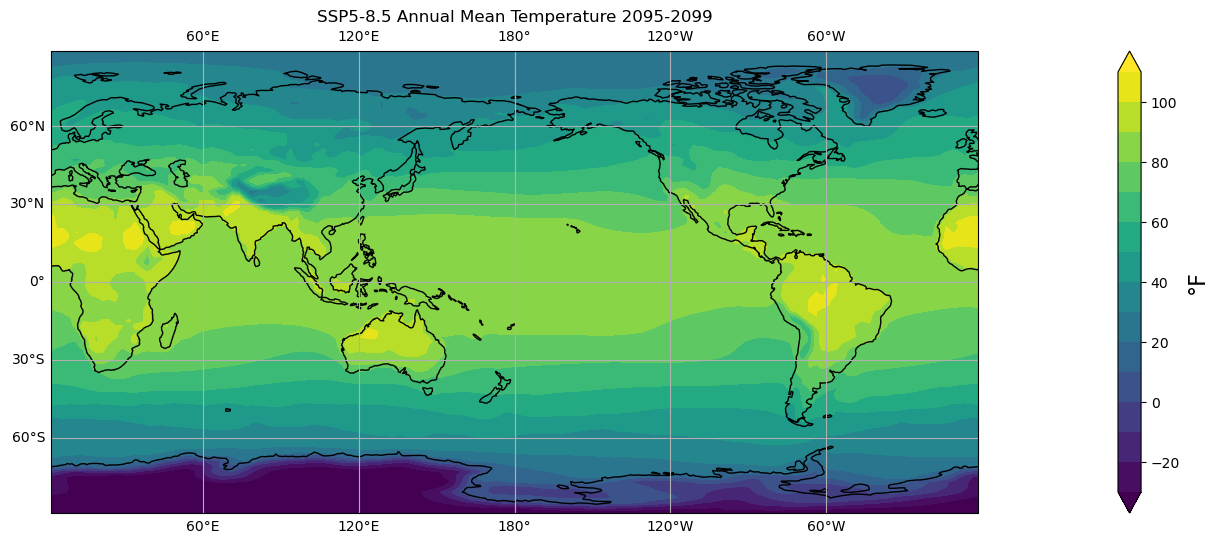

In [34]:
# Now let's plot the average temperature of the whole dataset. Another way of saying this is the climatology. In this case
# this climatology is calculated over the whole year, not just a season, so it is the annual-mean climatology

ssp5clim=ssp5temp.mean(dim='time')

# Initialize the figure with the specified projection
fig = plt.figure(figsize=(36, 6))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
plotnow = axs.contourf(lon, lat, ssp5clim, levels=colorlevels, extend='both', transform=ccrs.PlateCarree())

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(plotnow)
cbar.set_label('°F', fontsize=16)

# Add a title to the plot
plt.title('SSP5-8.5 Annual Mean Temperature 2095-2099')

# Show the plot
plt.show()


In [36]:
# Now find the annual mean temperature at our locations from before

loc1tempssp5 = ssp5clim.sel(lat = 48.8566, lon = 2.3522, method='nearest').values
print('Paris Annual Temperature ' + str(np.round(loc1tempssp5,1)) + ' F')


loc2tempssp5 = ssp5clim.sel(lat = 40.7128, lon = 360 - 74.0060, method='nearest').values
print('NYC Annual Temperature ' + str(np.round(loc2tempssp5,1))+ ' F')


loc2tempssp5 = ssp5clim.sel(lat = 10.6918, lon = 360 - 61.2225, method='nearest').values
print('Trinidad Annual Temperature ' + str(np.round(loc2tempssp5,1))+ ' F')

Paris Annual Temperature 65.9 F
NYC Annual Temperature 68.9 F
Trinidad Annual Temperature 87.8 F


In [ ]:
# How does these temperatures compare to before?

# Find how much it warms up inthe 3 locations of your choosing

In [37]:
# We can also plot the difference of the two climatologies. This will essentially tell us how much the annual mean temperature
# increases by in the SSP5-8.5 scenario everywhere

# First calculate the difference in the climatologies

diffssp5era = ssp5clim - eraclim

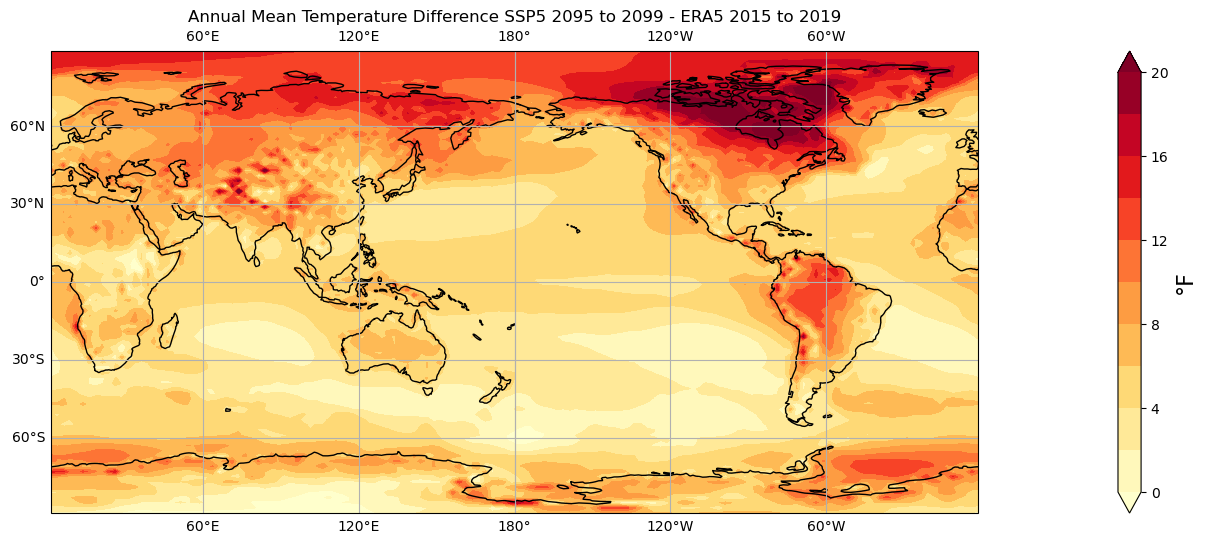

In [50]:
# Plot the difference, but we will have to make some modifications to our plotting code first:

# specify our colorbar properties 
color_mindiff = 0 # lower limit of -20 F
color_maxdiff = 20 # upper limit of 20 degrees F 
numberofstepsdiff = 11
colorlevelsdiff = np.linspace(color_mindiff, color_maxdiff, numberofstepsdiff)

# Initialize the figure with the specified projection
fig = plt.figure(figsize=(36, 6))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

plotnow = axs.contourf(lon, lat, diffssp5era,levels=colorlevelsdiff,extend='both', cmap = 'YlOrRd', transform=ccrs.PlateCarree())
#notice the addition of the specifier, cmap = 'YlOrRd', this changes the colormap to be a sequence of yellow, orange, and red

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(plotnow)
cbar.set_label('°F', fontsize=16)

# Add a title to the plot
plt.title('Annual Mean Temperature Difference SSP5 2095 to 2099 - ERA5 2015 to 2019')

# Show the plot
plt.show()

In [ ]:
# 1. Where does it warm up the most?
# 2. Where does it warm up the least?


In [46]:
# Let's now look at a different scenario, SSP2-4.5. This is a middle of the road Shared Socioeconomic Pathway 

# load in the daily max 2 m temperature and convert to Fahrenheit
ssp2ds = xr.open_dataset('cm4_ssp2.max_2m_temp.daily.2095-2099.nc')
ssp2temp=ssp2ds.tasmax 
ssp2temp=1.8*(ssp2temp-273.15)+32 

# Calculate the climatology and take the difference from the current climate
ssp2clim=ssp2temp.mean(dim='time')
diffssp2era = ssp2clim - eraclim

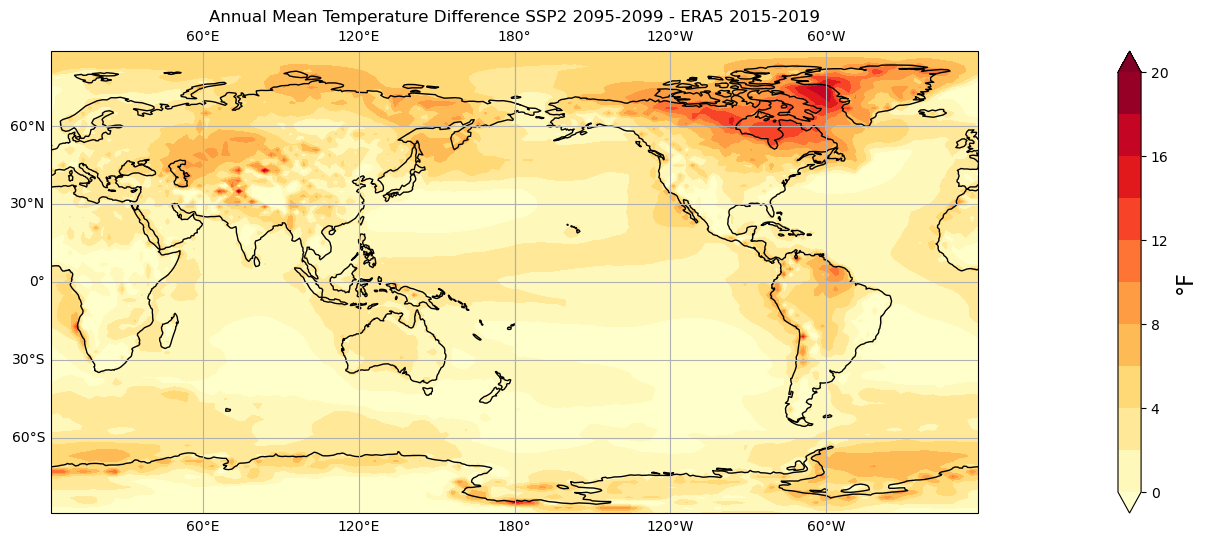

In [47]:
# Then plot the difference


# Initialize the figure with the specified projection
fig = plt.figure(figsize=(36, 6))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

plotnow = axs.contourf(lon, lat, diffssp2era,levels=colorlevelsdiff,extend='both', cmap = 'YlOrRd', transform=ccrs.PlateCarree())
#notice the addition of the specifier, cmap = 'YlOrRd', this changes the colormap to be a sequence of yellow, orange, and red

# Add coastlines to the plot
axs.coastlines(resolution='110m')
axs.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar with a label containing the degree symbol and adjust font size
cbar = fig.colorbar(plotnow)
cbar.set_label('°F', fontsize=16)

# Add a title to the plot
plt.title('Annual Mean Temperature Difference SSP2 2095-2099 - ERA5 2015-2019')

# Show the plot
plt.show()

In [ ]:
# How does the change in temperature relative to current climates in SSP5 compare to SSP2?

In [ ]:
# This ends the guided part of the tutorial. Now that you are equipped with some basic coding skills, 
# it is time for you to ask your own questions and do your own exploration.

# Here's Some Potential ideas to explore the data on your own:
# 1. Look at how temperature changes in the SSP2 and SSP5 simulations change for specific seasons
# 2. Look at how temperature changes in the SSP2 and SSP5 simulations on your birthday only
# 3. See how much temperature changes in specific cities or other places
# 4. Here is a link to data from the years 2055-2059. Compare this to 2015-2019 and/or 2095-2099